In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/florianbreton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Encodage des phrases en word2VEC et visualisation de la distribution des classes

/anaconda3/envs/nlp36/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  if sys.path[0] == '':


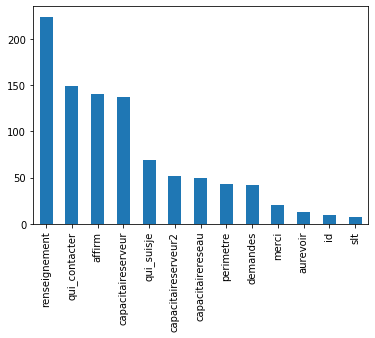

In [2]:
faq = pd.read_csv('./phrases.csv',sep=";") 
faq.columns=["phrases","intention"]

faq['intention'].value_counts().plot(kind='bar')


tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(faq["phrases"])]


model = Doc2Vec(tagged_data, epochs=300,vector_size=8, window=4, min_count=3, workers=8,dm=1)

vect = pd.DataFrame(model.docvecs.doctag_syn0)

In [3]:
faq

,phrases,intention
0,bye,aurevoir
1,hey,slt
2,hello,slt
3,salut,slt
4,heya,slt
5,slt,slt
6,salut toi,slt
7,au revoir,aurevoir
8,aurevoir,aurevoir
9,bye bye,aurevoir


## visualisation des vecteurs de mots

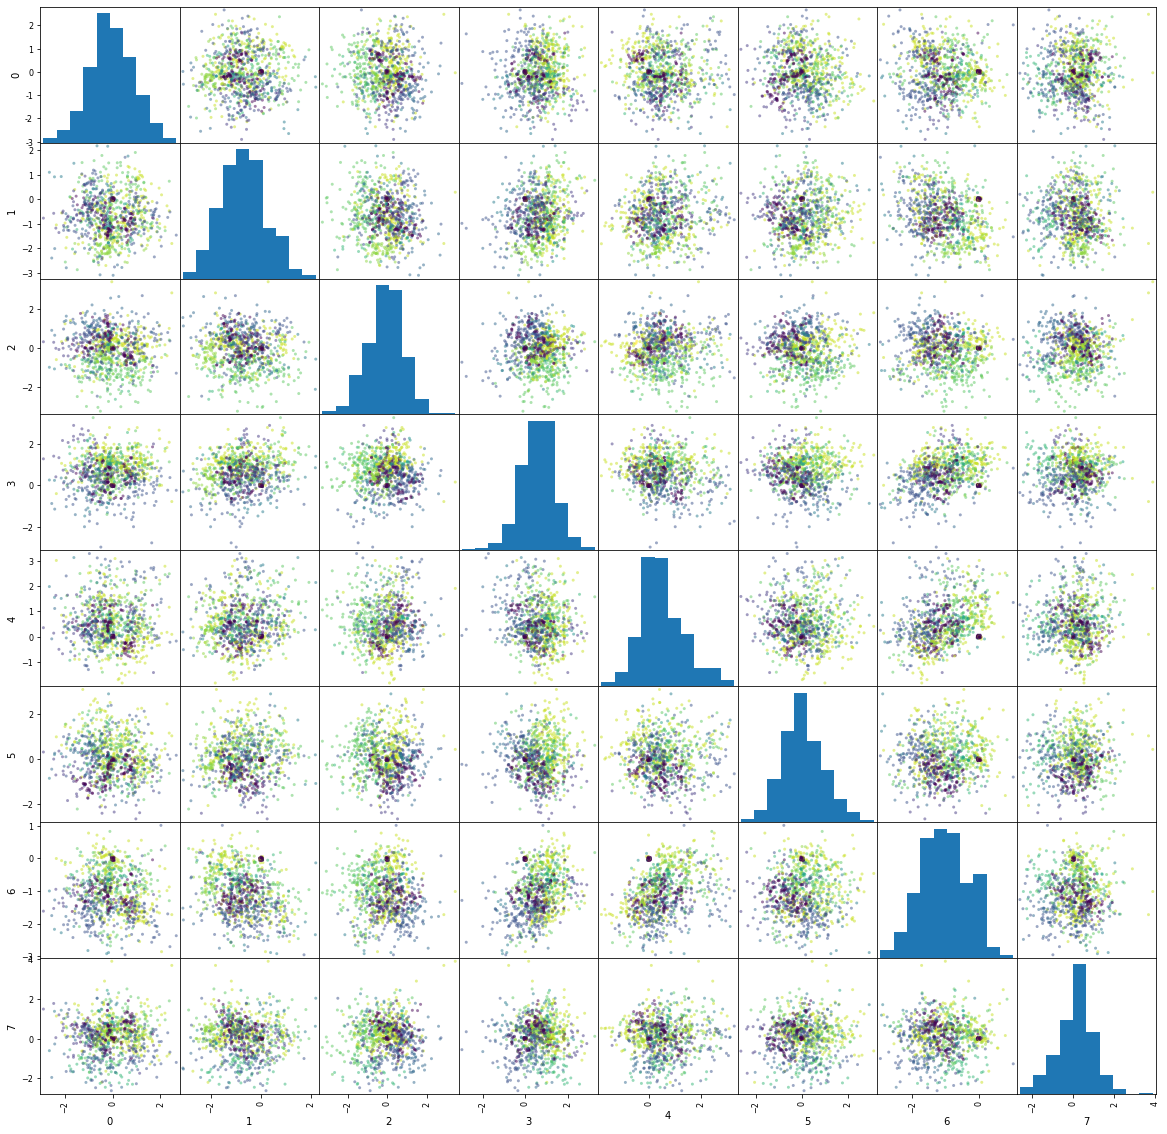

In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

faq["intention"]=faq["intention"].astype('category').cat.codes
from pandas.plotting import scatter_matrix
sm = scatter_matrix(vect,c=faq["intention"],figsize=(20, 20))

In [5]:
# ajout des vecteurs dans le dataframe
faq["phrasevec"]= list(map(lambda x: list(vect.iloc[x]), range(959)))

## classification via SVM (sans equilibrage SMOTE) 

In [6]:
from sklearn import svm
X = list(faq["phrasevec"])
y = list(faq["intention"])
clf = svm.SVC(kernel="linear")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=15)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6458333333333334


In [7]:
from sklearn.metrics import classification_report

#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.75      0.59        36
           1       0.00      0.00      0.00         4
           2       0.62      0.62      0.62        16
           3       0.58      0.81      0.68        32
           4       0.83      0.59      0.69        17
           5       1.00      0.08      0.14        13
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         5
           8       0.88      0.70      0.78        10
           9       0.71      0.67      0.69        36
          10       0.45      0.56      0.50         9
          11       0.79      0.78      0.78        58
          12       0.00      0.00      0.00         2

    accuracy                           0.65       240
   macro avg       0.49      0.43      0.42       240
weighted avg       0.65      0.65      0.62       240



/anaconda3/envs/nlp36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
from imblearn.over_sampling import SMOTE, ADASYN

## Fit du SMOTE pour équilibrage

In [9]:
smt = SMOTE()
X, y = smt.fit_sample(X, y)

In [14]:
r = pd.DataFrame()
r["ph"]=list(X)
r["lab"]=list(y)

## Dataset équilibré

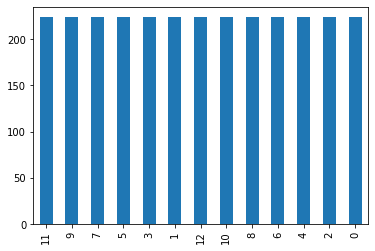

In [15]:
r['lab'].value_counts().plot(kind='bar')

## SVM sur dataset equilibré

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=15)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.804945054945055


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.40      0.43        52
           1       0.93      0.70      0.80        54
           2       0.81      1.00      0.90        61
           3       0.83      0.82      0.83        55
           4       1.00      0.92      0.96        60
           5       0.83      0.75      0.79        53
           6       0.86      0.92      0.89        59
           7       0.82      0.82      0.82        55
           8       0.91      0.98      0.94        59
           9       0.74      0.66      0.70        53
          10       0.89      0.88      0.88        56
          11       0.74      0.54      0.63        57
          12       0.65      1.00      0.79        54

    accuracy                           0.80       728
   macro avg       0.81      0.80      0.80       728
weighted avg       0.81      0.80      0.80       728

